<a href="https://colab.research.google.com/github/RudreshKale/CarPrediction/blob/main/Car_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [ ]:
# read the file 
df= pd.read_csv("CarPrice.csv")
df.head()
      

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
#  Model 
# Seprating the data
x=df.drop(columns='price')
y=df['price']


In [ ]:
# using onehotencoder to convert string value into float to fit the data
ohe=OneHotEncoder()
ohe.fit(x[['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']])
       
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']),remainder='passthrough')       

In [ ]:
# Train_test_split the data
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2)


Linear Regression

In [ ]:
# Linear Regression
model_LR=LinearRegression()
pipe=make_pipeline(column_trans,model_LR)
pipe.fit(X_train,y_train)

R2 Score for train data



In [ ]:
train_data_pred= pipe.predict(X_train)
error_score=metrics.r2_score(y_train,train_data_pred)
print("R2_score :",error_score)

R2_score : 0.9999999999999913


Visualize the train data

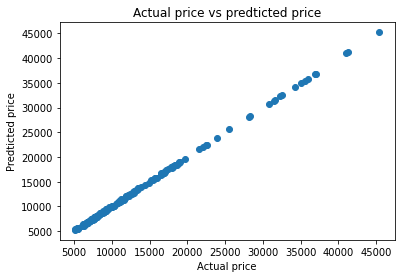

In [ ]:
# visualize the train data
plt.scatter(y_train,train_data_pred)
plt.xlabel("Actual price")
plt.ylabel("Predticted price")
plt.title("Actual price vs predticted price")
plt.show()

R2 Score for test data

In [ ]:
test_data_pred= pipe.predict(X_test)
error_score=metrics.r2_score(y_test,test_data_pred)
print("R2_score :",error_score)


R2_score : 0.8285210252929402


Visualize the test data

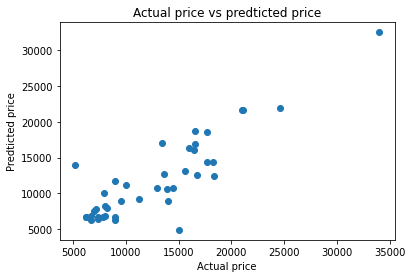

In [ ]:
# visualize the test data
plt.scatter(y_test,test_data_pred)
plt.xlabel("Actual price")
plt.ylabel("Predticted price")
plt.title("Actual price vs predticted price")
plt.show()

Lasso model


In [ ]:
#  lasso 
model_LR=Lasso()
pipe=make_pipeline(column_trans,model_LR)
pipe.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4591071.900605959, tolerance: 1156158.1346804202
  model = cd_fast.sparse_enet_coordinate_descent(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,...
       34, 36, 37, 38, 39, 41, 42, 43, 46, 47, 50, 53, 54])]),
                                                  ['car_ID', 'symboling',
                                                   'CarName', 'fueltype',
                                                   'aspiration', 'doornumber',
                                                   'carbody', 'd

R2 score of train data


In [ ]:
train_data_pred= pipe.predict(X_train)
error_score=metrics.r2_score(y_train,train_data_pred)
print("R2_score :",error_score)



R2_score : 0.9998140941485247


Visualize the train data

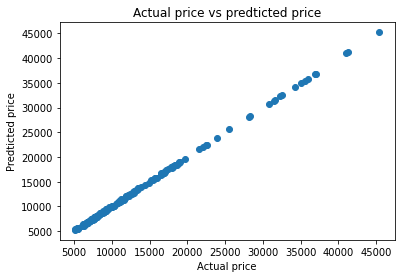

In [ ]:
plt.scatter(y_train,train_data_pred)
plt.xlabel("Actual price")
plt.ylabel("Predticted price")
plt.title("Actual price vs predticted price")
plt.show()

R2 score of test data

In [ ]:
test_data_pred= pipe.predict(X_test)
error_score=metrics.r2_score(y_test,test_data_pred)
print("R2_score :",error_score)


R2_score : 0.7340075866715123


Visualize the test data

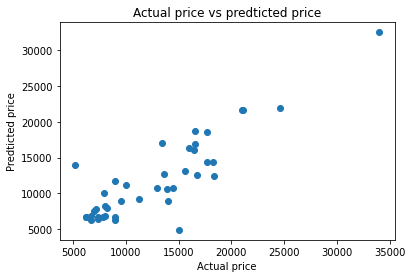

In [ ]:
plt.scatter(y_test,test_data_pred)
plt.xlabel("Actual price")
plt.ylabel("Predticted price")
plt.title("Actual price vs predticted price")
plt.show()